[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


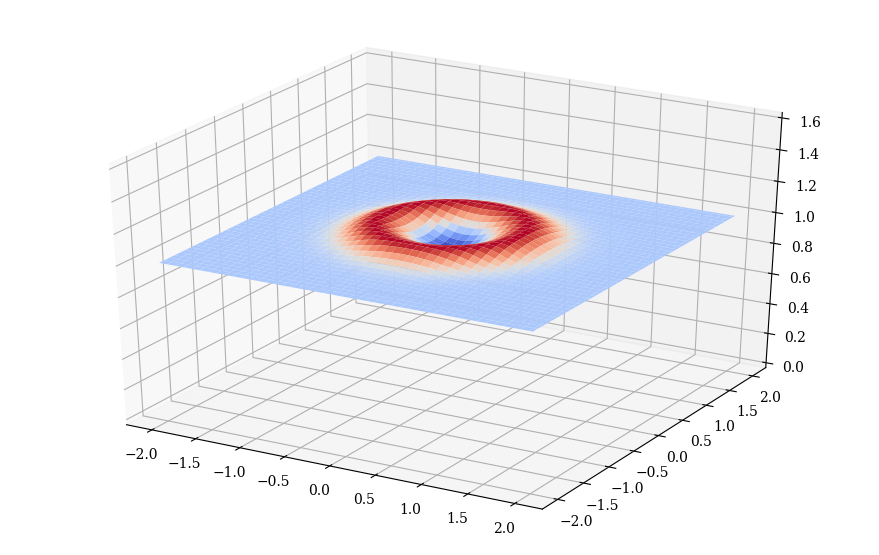

[   0.    62.5  125.   187.5  250.   312.5  375.   437.5  500. ]


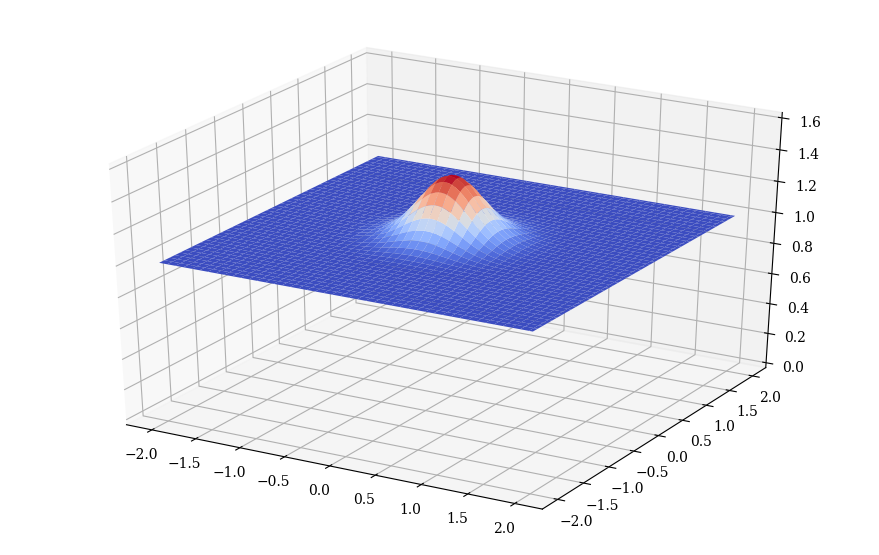

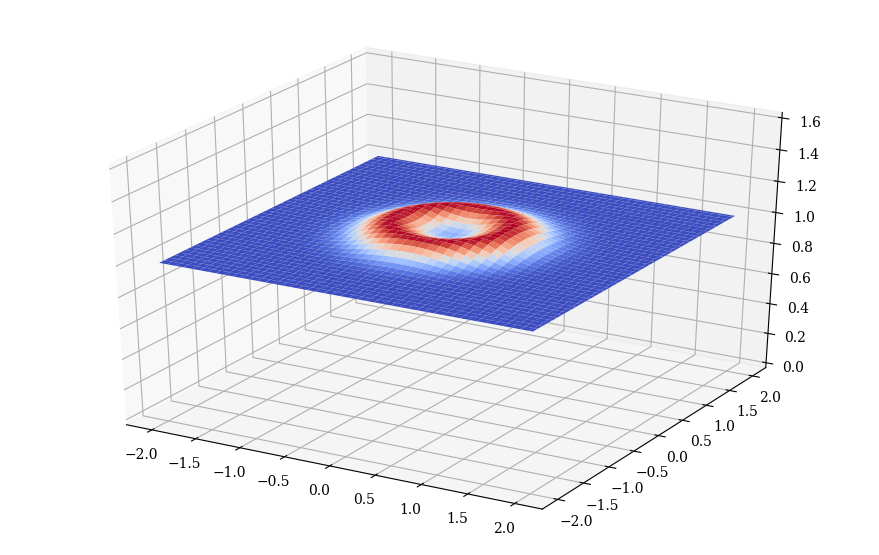

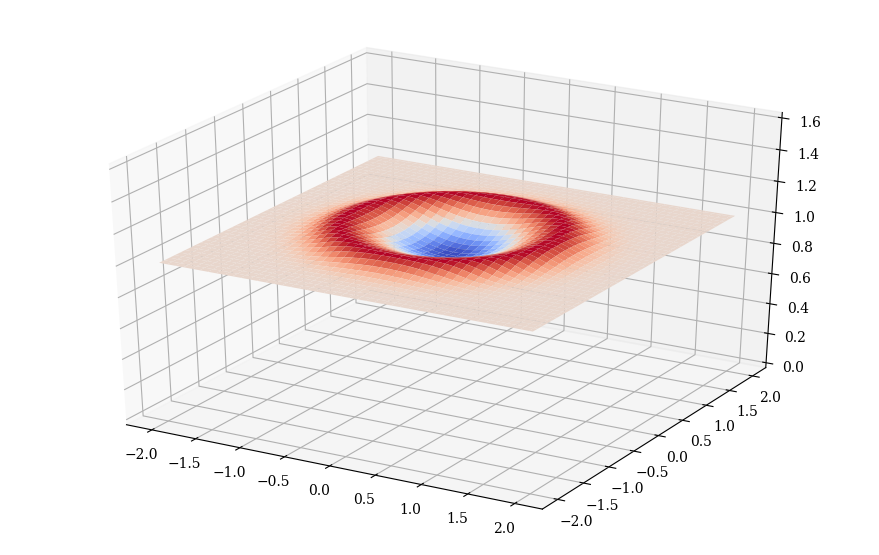

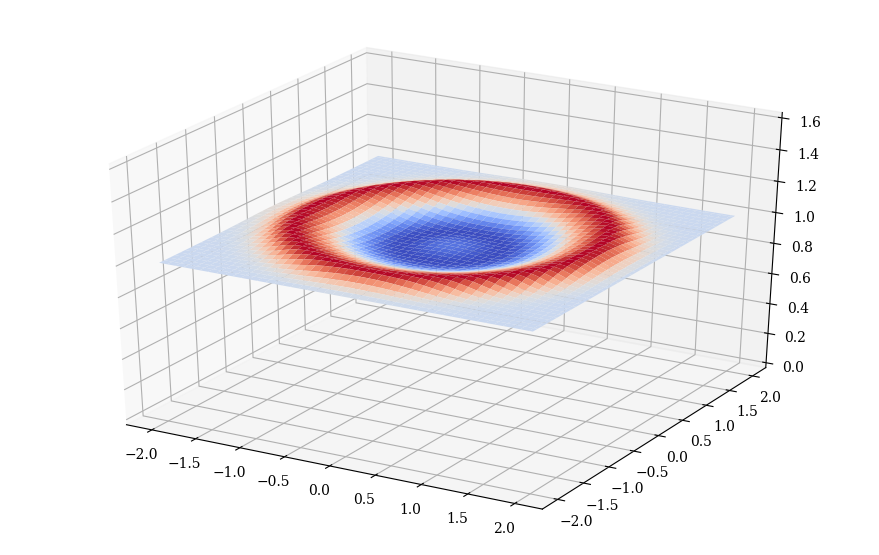

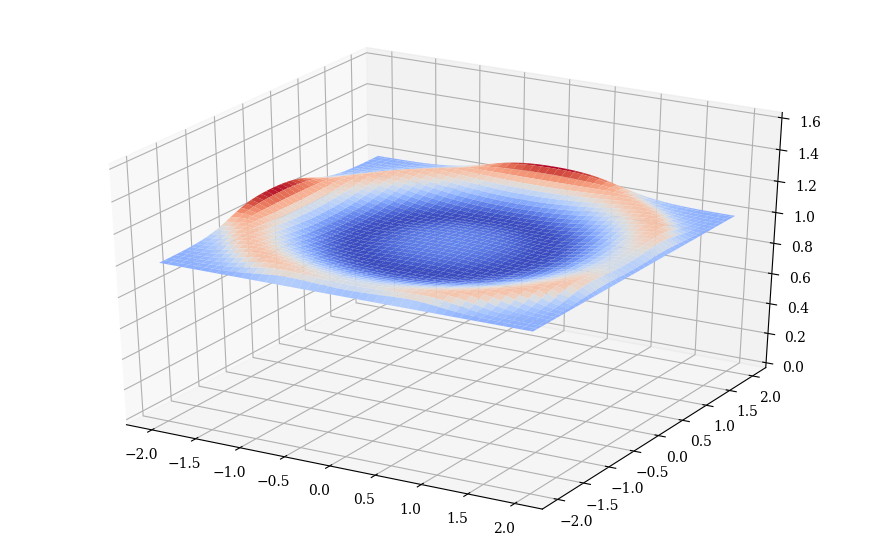

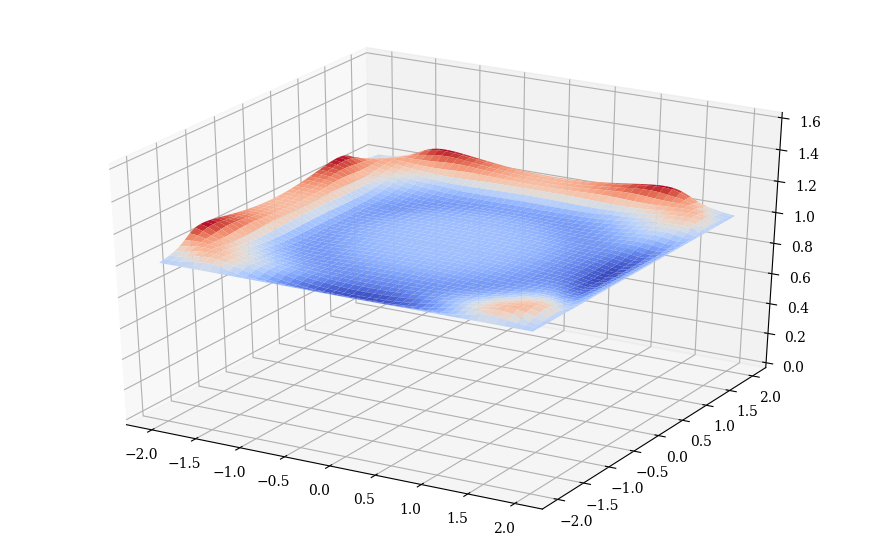

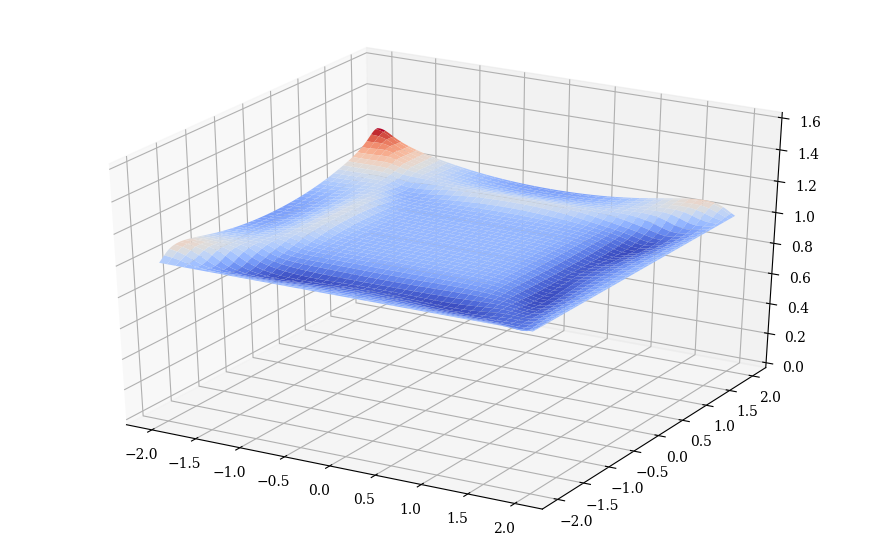

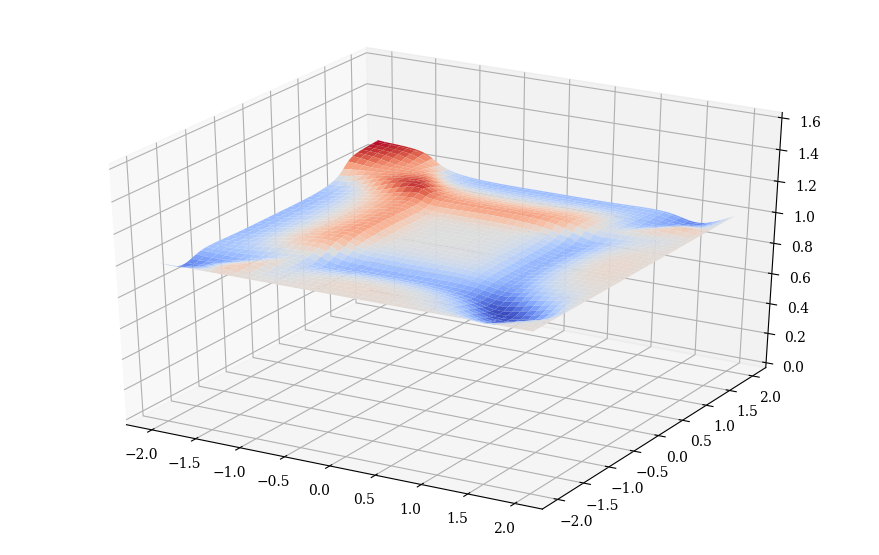

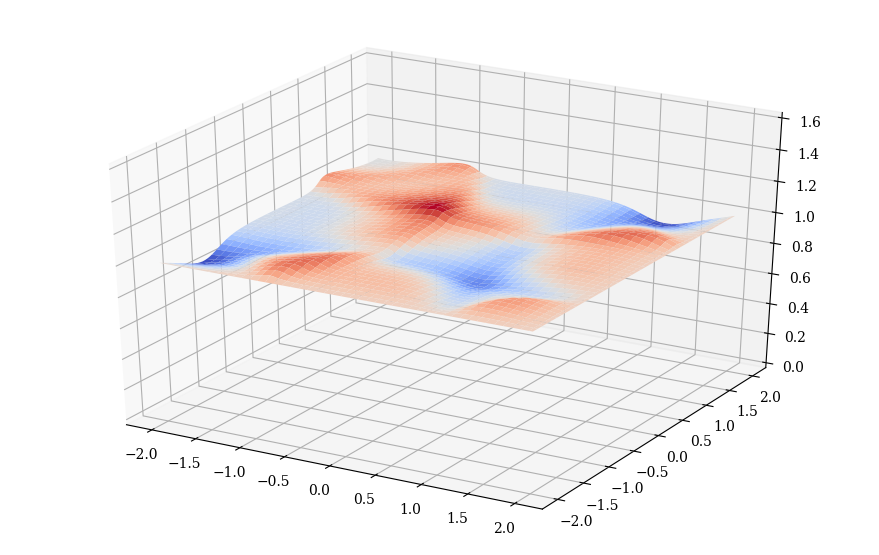

IndexError: index 9 is out of bounds for axis 0 with size 9

In [34]:
#Felipe Muñoz Basualdo
#Rene Velasquez Carcamo

### Preambulo ###
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from scipy import sparse

#%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 10
rcParams['figure.figsize'] = 10, 8


#Variables 1D
g=9.81
h0=1
dt=0.002
xmin=-2.
xmax=2.
nx=501
L=xmax-xmin
dx=(L/nx)
x=np.linspace(xmin,xmax,int(nx))
#print(x)
nt=300 #pasos de tiempo

def h(x,h0):
    w=h0+0.4*np.exp(-5*x**2)
    return w

h_inicial=h(x,h0)
u_inicial=np.zeros(nx)
#print(h_inicial)
h=h_inicial.copy()
u=u_inicial.copy()
for t in range(nt):
    U1=h
    U2=h*u
    F1=h*u
    F2=h*u**2+0.5*g*h**2
    U1_n=U1.copy()
    U2_n=U2.copy()
    F1_n=F1.copy()
    F2_n=F2.copy()    
    U1[1:-1]=1/2*(U1_n[2:]+U1_n[:-2])-dt*(F1_n[2:]-F1_n[:-2])/(2*dx)
    U2[1:-1]=1/2*(U2_n[2:]+U2_n[:-2])-dt*(F2_n[2:]-F2_n[:-2])/(2*dx)

    U1[-1]=U1[-2]
    U2[-1]=0
    U1[0]=U1[1]
    U2[0]=U2[1]
    h=U1
    u=U2/U1
    #print(h)
    #if t%5==0:
        #plt.plot(x,h,c='k',lw=2)
        #plt.ylim([0,2]);
        #plt.show()
        #savefig(ruta) #Guarda la imagen para hacer el GIF
        #Hay una forma de hacer una animación automaticamente. Revisar.
#print(h)

    

#Variables 1D
g=9.81
h0=1
dt=0.002
xmin=-2.
xmax=2.
ymin=-2.
ymax=2.
n=401
L=xmax-xmin
dx=(L/n)
dy=(L/n)
x=np.linspace(xmin,xmax,int(n))
y=np.linspace(ymin,ymax,int(n))
malla=np.zeros((n,n))
#print(malla)
nt=1000 #pasos de tiempo



#Problema 2D
def h2D_inicial(x,y,malla,h0):
    n=len(x)
    for i in range(n):
        for j in range(n):
            malla[i,j]=h0+0.4*np.exp(-5*(x[i]**2+y[j]**2))
    return malla

h2D_inicial=h2D_inicial(x,y,malla,h0)
h=h2D_inicial.copy()

print(h)

def LaxFreddy2D(nx,h,dt,dx,nt):
    U_inicial=np.zeros((n,n))
    u=U_inicial.copy()
    v=U_inicial.copy()

    for t in range(nt):
        #Definiciones h,u,v
        u1=h
        u2=u*h
        u3=v*h
        f1=h*u
        f2=h*u**2+0.5*g*h**2
        f3=h*u*v
        g1=h*v
        g2=h*u*v
        g3=h*v**2+0.5*g*h**2

        #Copia de matrices
        u1_n=u1.copy()
        u2_n=u2.copy()
        u3_n=u3.copy()
        f1_n=f1.copy()
        f2_n=f2.copy()
        f3_n=f3.copy()
        g1_n=g1.copy()
        g2_n=g2.copy()
        g3_n=g3.copy()

        #Esquema Lax-Friedrichs
        u1[1:-1,1:-1]=0.25*(u1_n[2:,1:-1]+u1_n[:-2,1:-1]+u1_n[1:-1,2:]+u1_n[1:-1,:-2])\
                        -dt/(2*dx)*(f1_n[2:,1:-1]-f1_n[:-2,1:-1])-dt/(2*dy)*(g1_n[1:-1,2:]-g1_n[1:-1,:-2])
        u2[1:-1,1:-1]=0.25*(u2_n[2:,1:-1]+u2_n[:-2,1:-1]+u2_n[1:-1,2:]+u2_n[1:-1,:-2])\
                        -dt/(2*dx)*(f2_n[2:,1:-1]-f2_n[:-2,1:-1])-dt/(2*dy)*(g2_n[1:-1,2:]-g2_n[1:-1,:-2])
        u3[1:-1,1:-1]=0.25*(u3_n[2:,1:-1]+u3_n[:-2,1:-1]+u3_n[1:-1,2:]+u3_n[1:-1,:-2])\
                        -dt/(2*dx)*(f3_n[2:,1:-1]-f3_n[:-2,1:-1])-dt/(2*dy)*(g3_n[1:-1,2:]-g3_n[1:-1,:-2])


        #Redefinicion de las velocidades y la altura
        h=u1.copy()
        u=u2/h
        v=u3/h


        #Condiciones de borde
        u[-1,:]=0     ##pared
        v[-1,:]=0     ##pared
        h[-1,:]=h[-2,:] ##pared
        u[0,:]=u[1,:]  ##salida
        v[0,:]=v[1,:]  ##salida
        u[:,0]=0  ##pared
        v[:,0]=0  ##pared
        h[:,0]=h[:,1]  ##pared
        u[:,-1]=u[:,-2]  ##salida
        v[:,-1]=v[:,-2]  ##salida

        
        

                
            
    return h,u,v

nx=401
dx=4.0/(nx-1)
dt=0.002
nt=80
h=h2D_inicial
h,u,v=LF2D(nx,h,dt,dx,nt)
X,Y = np.meshgrid(x,y)
fig = plt.figure(figsize=(11,7), dpi=100);
ax = fig.gca(projection='3d');
ax.set_zlim(0, 1.6);
dd=ax.plot_surface(X,Y,h, cmap='coolwarm');
plt.show()

tiempo=np.linspace(0,500,9)
print(tiempo)
pp=len(tiempo)
for i in range(pp-1):
    nx=401
    dx=4.0/(nx-1)
    dt=0.002
    nt=80
    h=h2D_inicial
    h,u,v=LF2D(nx,h,dt,dx,int(tiempo[i]))
    X,Y = np.meshgrid(x,y)
    fig = plt.figure(figsize=(11,7), dpi=100);
    ax = fig.gca(projection='3d');
    ax.set_zlim(0, 1.6);
    dd=ax.plot_surface(X,Y,h, cmap='coolwarm');
    plt.show()
    

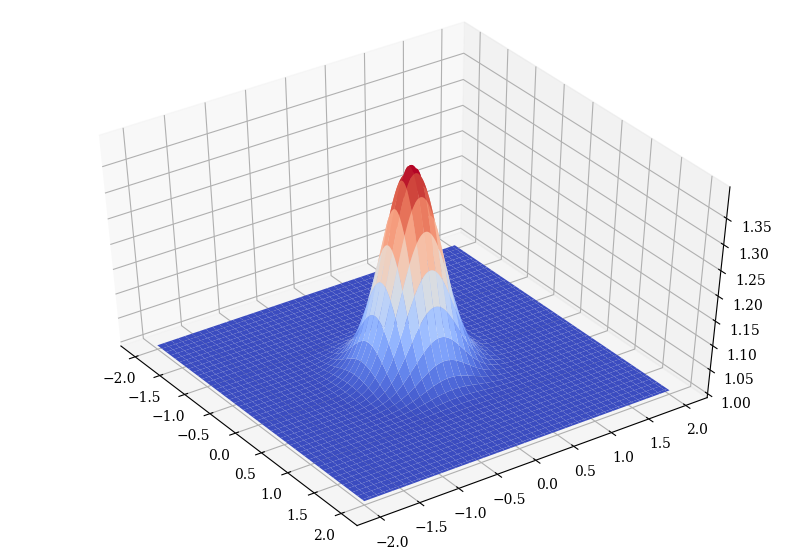

In [79]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7), dpi=100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
ax.view_init(45, -35)
#ax.plot_surface(X,Y,h2D_inicial,rstride=1, cstride=1, cmap='coolwarm'); #preguntar como cambiar el eje z
ax.plot_surface(X,Y,h2D_inicial, cmap='coolwarm'); #preguntar como cambiar el eje z
plt.show()